In [2]:
# Topic:        Project 2
# Subject:      Market Basket Analysis of Instacart - EDA
# Date:         04/09/2020
# Name:         yalin yener

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.read_csv("Data/aisles.csv")

aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]

In [15]:
aisle = pd.read_csv("/Users/yalinyener/GitHub/yalinyener/Instacart/Data/aisles.csv")
departments = pd.read_csv("/Users/yalinyener/GitHub/yalinyener/Instacart/Data/departments.csv")
orders = pd.read_csv("/Users/yalinyener/GitHub/yalinyener/Instacart/Data/orders.csv")
products = pd.read_csv("/Users/yalinyener/GitHub/yalinyener/Instacart/Data/products.csv")
order_products1= pd.read_csv("/Users/yalinyener/GitHub/yalinyener/Instacart/Data/order_products__prior.csv")
order_products2= pd.read_csv("/Users/yalinyener/GitHub/yalinyener/Instacart/Data/order_products__train.csv")

In [20]:
order_products2.shape

(1384617, 4)

In [21]:
32434489+1284617

33719106

In [4]:
#Checking Data Frame - Aisle
aisle.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [5]:
#Checking Data Frame - Departments
departments.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [6]:
#Checking Data Frame - Orders
del orders["eval_set"]
orders.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [7]:
#Checking Data Frame - Product
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [9]:
#Checking Data Frame - Order-Product
order_products.head()

order_id  product_id  add_to_cart_order  reordered
0         1       10246                  3          0
1         1       11109                  2          1
2         1       13176                  6          0
3         1       22035                  8          1
4         1       43633                  5          1

In [10]:
# Join Product, Departments and Aisle Data Frame to product_all data frame
product_aisle  = products.merge(aisle, left_on="aisle_id", right_on="aisle_id")
product_all = product_aisle.merge(departments, left_on="department_id", right_on="department_id")
product_all = product_all.drop(columns=["aisle_id","department_id"])
product_all = product_all[['product_id', 'product_name', 'department','aisle', ]]
product_all.head()

product_id                                    product_name department  \
0           1                      Chocolate Sandwich Cookies     snacks   
1          78               Nutter Butter Cookie Bites Go-Pak     snacks   
2         102                           Danish Butter Cookies     snacks   
3         172  Gluten Free All Natural Chocolate Chip Cookies     snacks   
4         285                    Mini Nilla Wafers Munch Pack     snacks   

           aisle  
0  cookies cakes  
1  cookies cakes  
2  cookies cakes  
3  cookies cakes  
4  cookies cakes

In [11]:
# Join Order_Products with product_all
order_products = order_products.merge(product_all,left_on="product_id", right_on="product_id")
order_products.head()

order_id  product_id  add_to_cart_order  reordered           product_name  \
0         1       10246                  3          0  Organic Celery Hearts   
1       307       10246                  3          1  Organic Celery Hearts   
2       615       10246                  5          1  Organic Celery Hearts   
3      1133       10246                  7          0  Organic Celery Hearts   
4      1148       10246                  8          0  Organic Celery Hearts   

  department             aisle  
0    produce  fresh vegetables  
1    produce  fresh vegetables  
2    produce  fresh vegetables  
3    produce  fresh vegetables  
4    produce  fresh vegetables

In [23]:
market_basket = order_products.merge(orders, left_on="order_id",right_on="order_id")
market_basket.sample(5)

order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
1262803   3120253       11422                 11          0   167328    train   
1099761   2718610       14337                  5          1   115048    train   
1132429   2798447       32566                  5          1   184314    train   
1374489   3398019       43122                  5          1   177691    train   
857953    2117663         305                 18          1    30271    train   

         order_number  order_dow  order_hour_of_day  days_since_prior_order  
1262803             4          0                 13                    15.0  
1099761             6          4                 15                    30.0  
1132429            15          6                 12                    30.0  
1374489            12          1                 21                    18.0  
857953             17          0                  9                    15.0

In [13]:
market_basket = market_basket[['user_id','order_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order','product_name', 'add_to_cart_order', 'reordered',
    'department', 'aisle' ]]

market_basket.head()

user_id  order_id  order_number  order_dow  order_hour_of_day  \
0   112108         1             4          4                 10   
1   112108         1             4          4                 10   
2   112108         1             4          4                 10   
3   112108         1             4          4                 10   
4   112108         1             4          4                 10   

   days_since_prior_order                                   product_name  \
0                     9.0                          Organic Celery Hearts   
1                     9.0  Organic 4% Milk Fat Whole Milk Cottage Cheese   
2                     9.0                         Bag of Organic Bananas   
3                     9.0                    Organic Whole String Cheese   
4                     9.0           Lightly Smoked Sardines in Olive Oil   

   add_to_cart_order  reordered    department                 aisle  
0                  3          0       produce      fresh vegetables  
1                  2          1    dairy eggs  other creams cheeses  
2                  6          0       produce          fresh fruits  
3                  8          1    dairy eggs       packaged cheese  
4                  5          1  canned goods   canned meat seafood

In [14]:
#converting number of day to name

market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Monday" if x==1 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Friday" if x==5 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

In [15]:
#Saving result data frame as a Pickle File
market_basket.to_pickle("MarketBasketInitialPickle")

In [ ]:
#Reading market basket initial from Pickle File as a data frame
market_basket = pd.read_pickle("MarketBasketInitialPickle")

# Exploratory Data Analysis

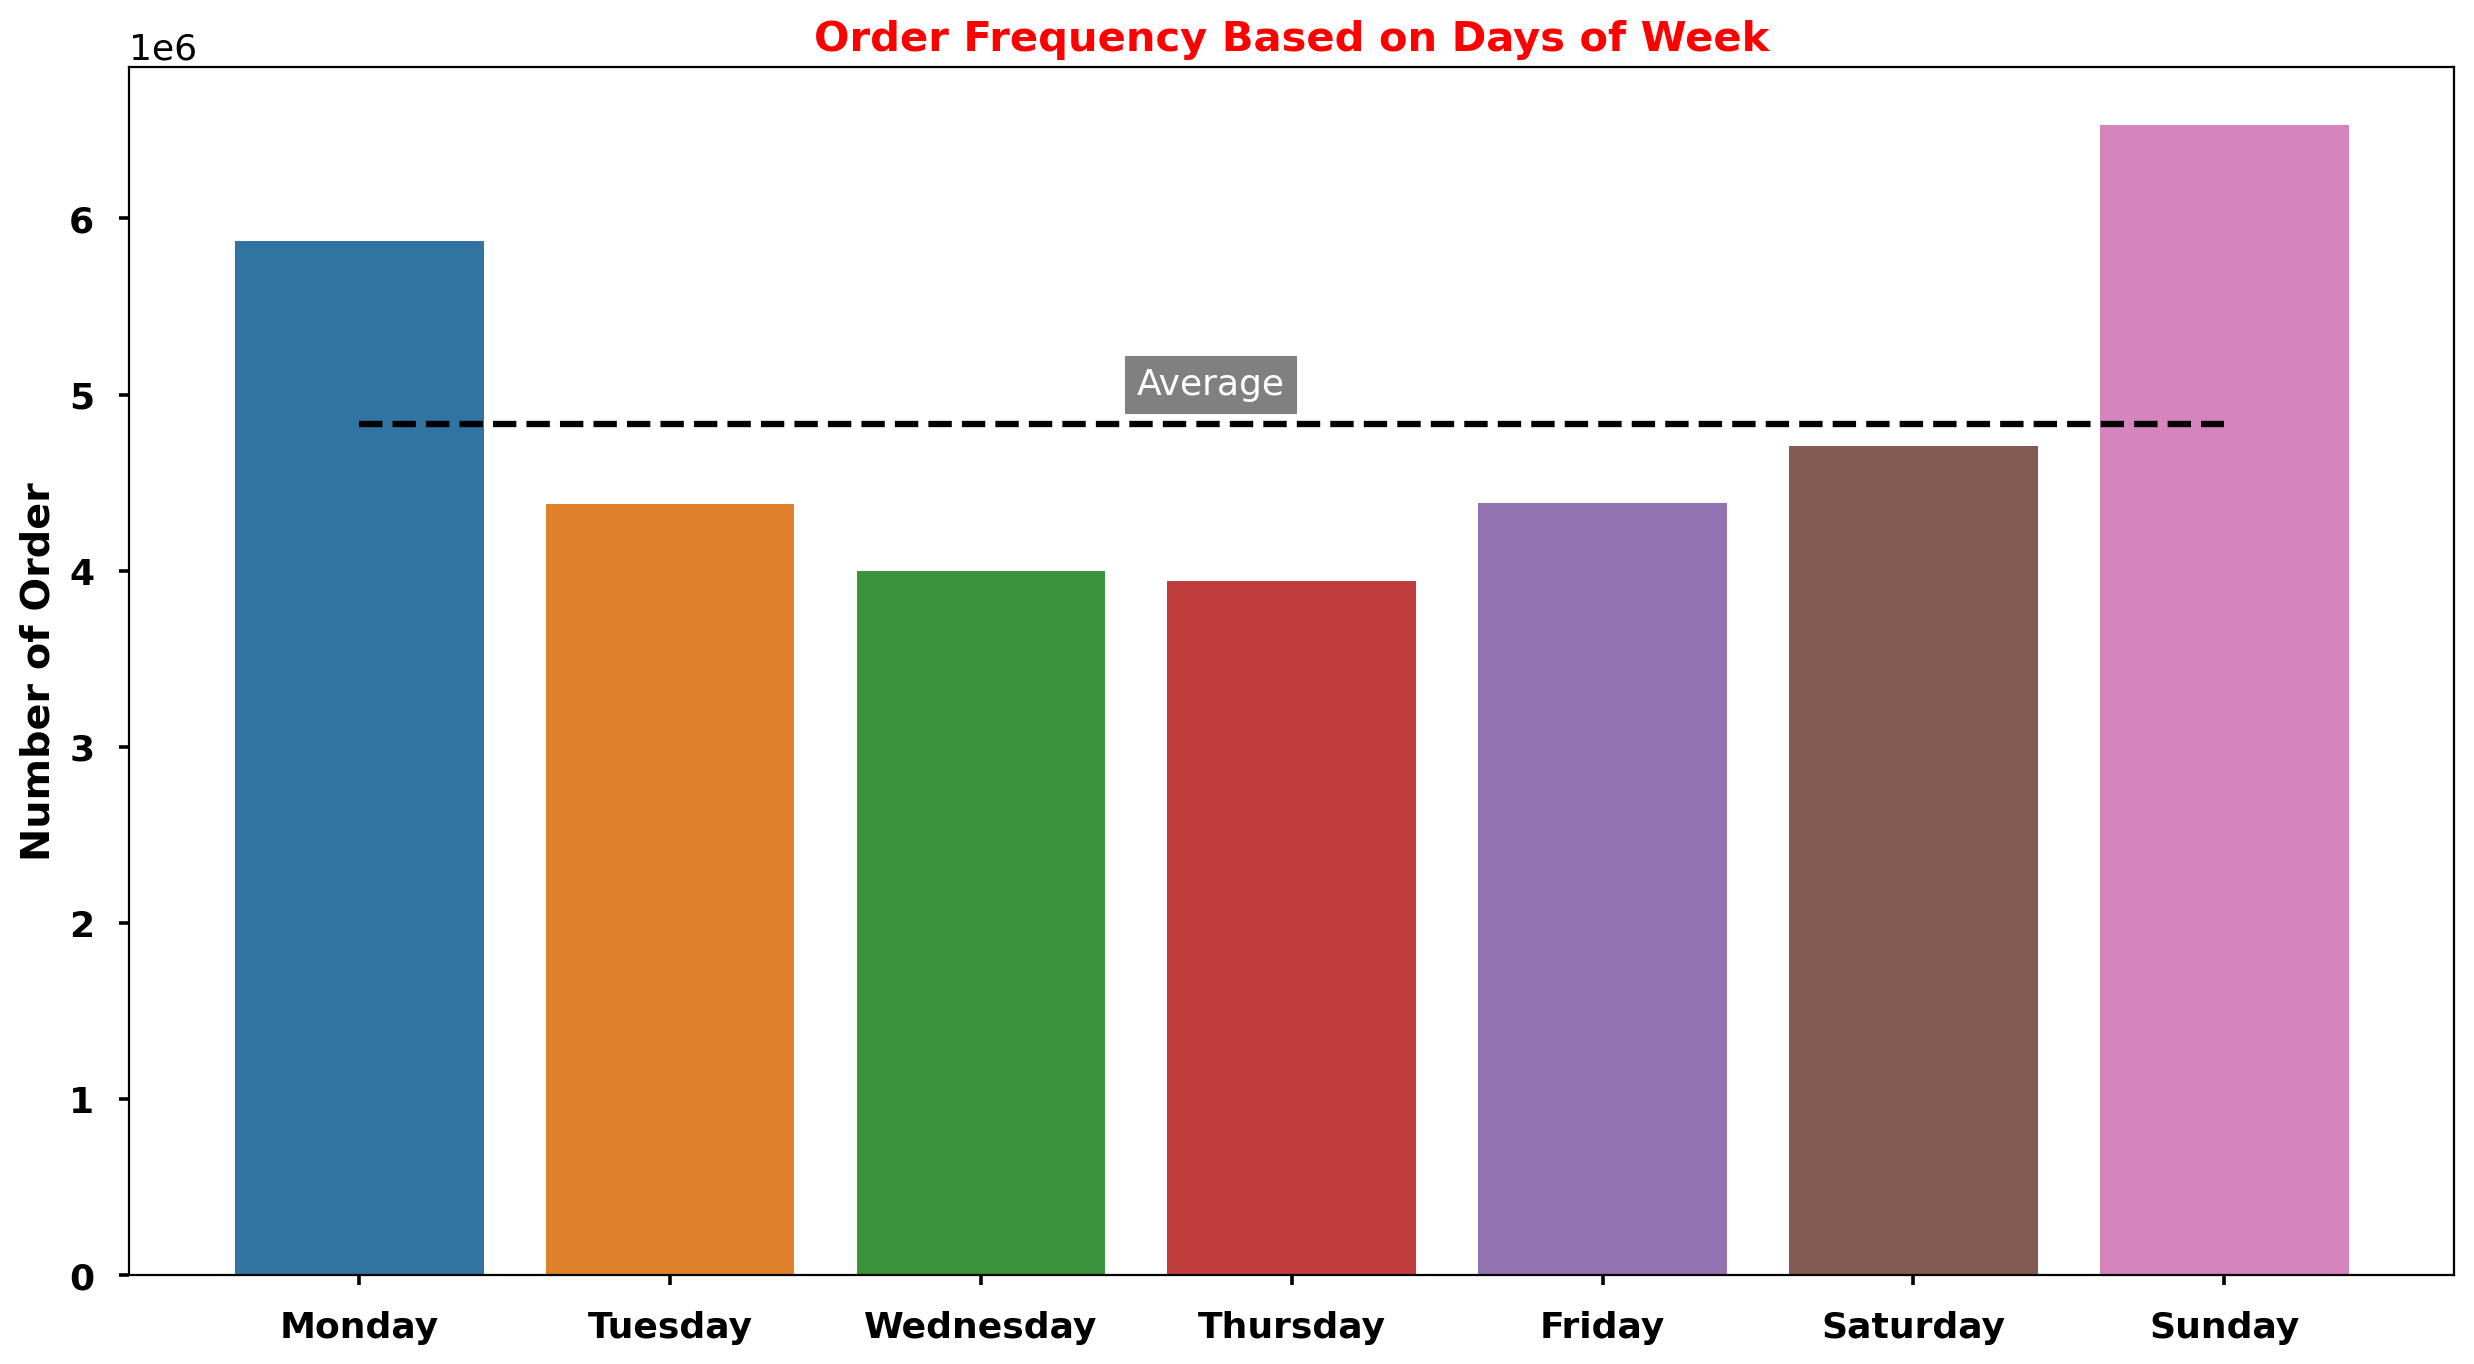

In [21]:
#Frequency of Order Based on Days
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')
ax = sns.countplot(x="order_dow",data=market_basket,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Order Frequency Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Number of Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
x_coordinates = [0, 6]
y_median = [4831300.857142857, 4831300.857142857]
plt.text(2.5,5000000,'Average',fontsize = 13,backgroundcolor = 'gray',color = 'white')
plt.plot(x_coordinates, y_median,linestyle = '--', c="black")
plt.show()

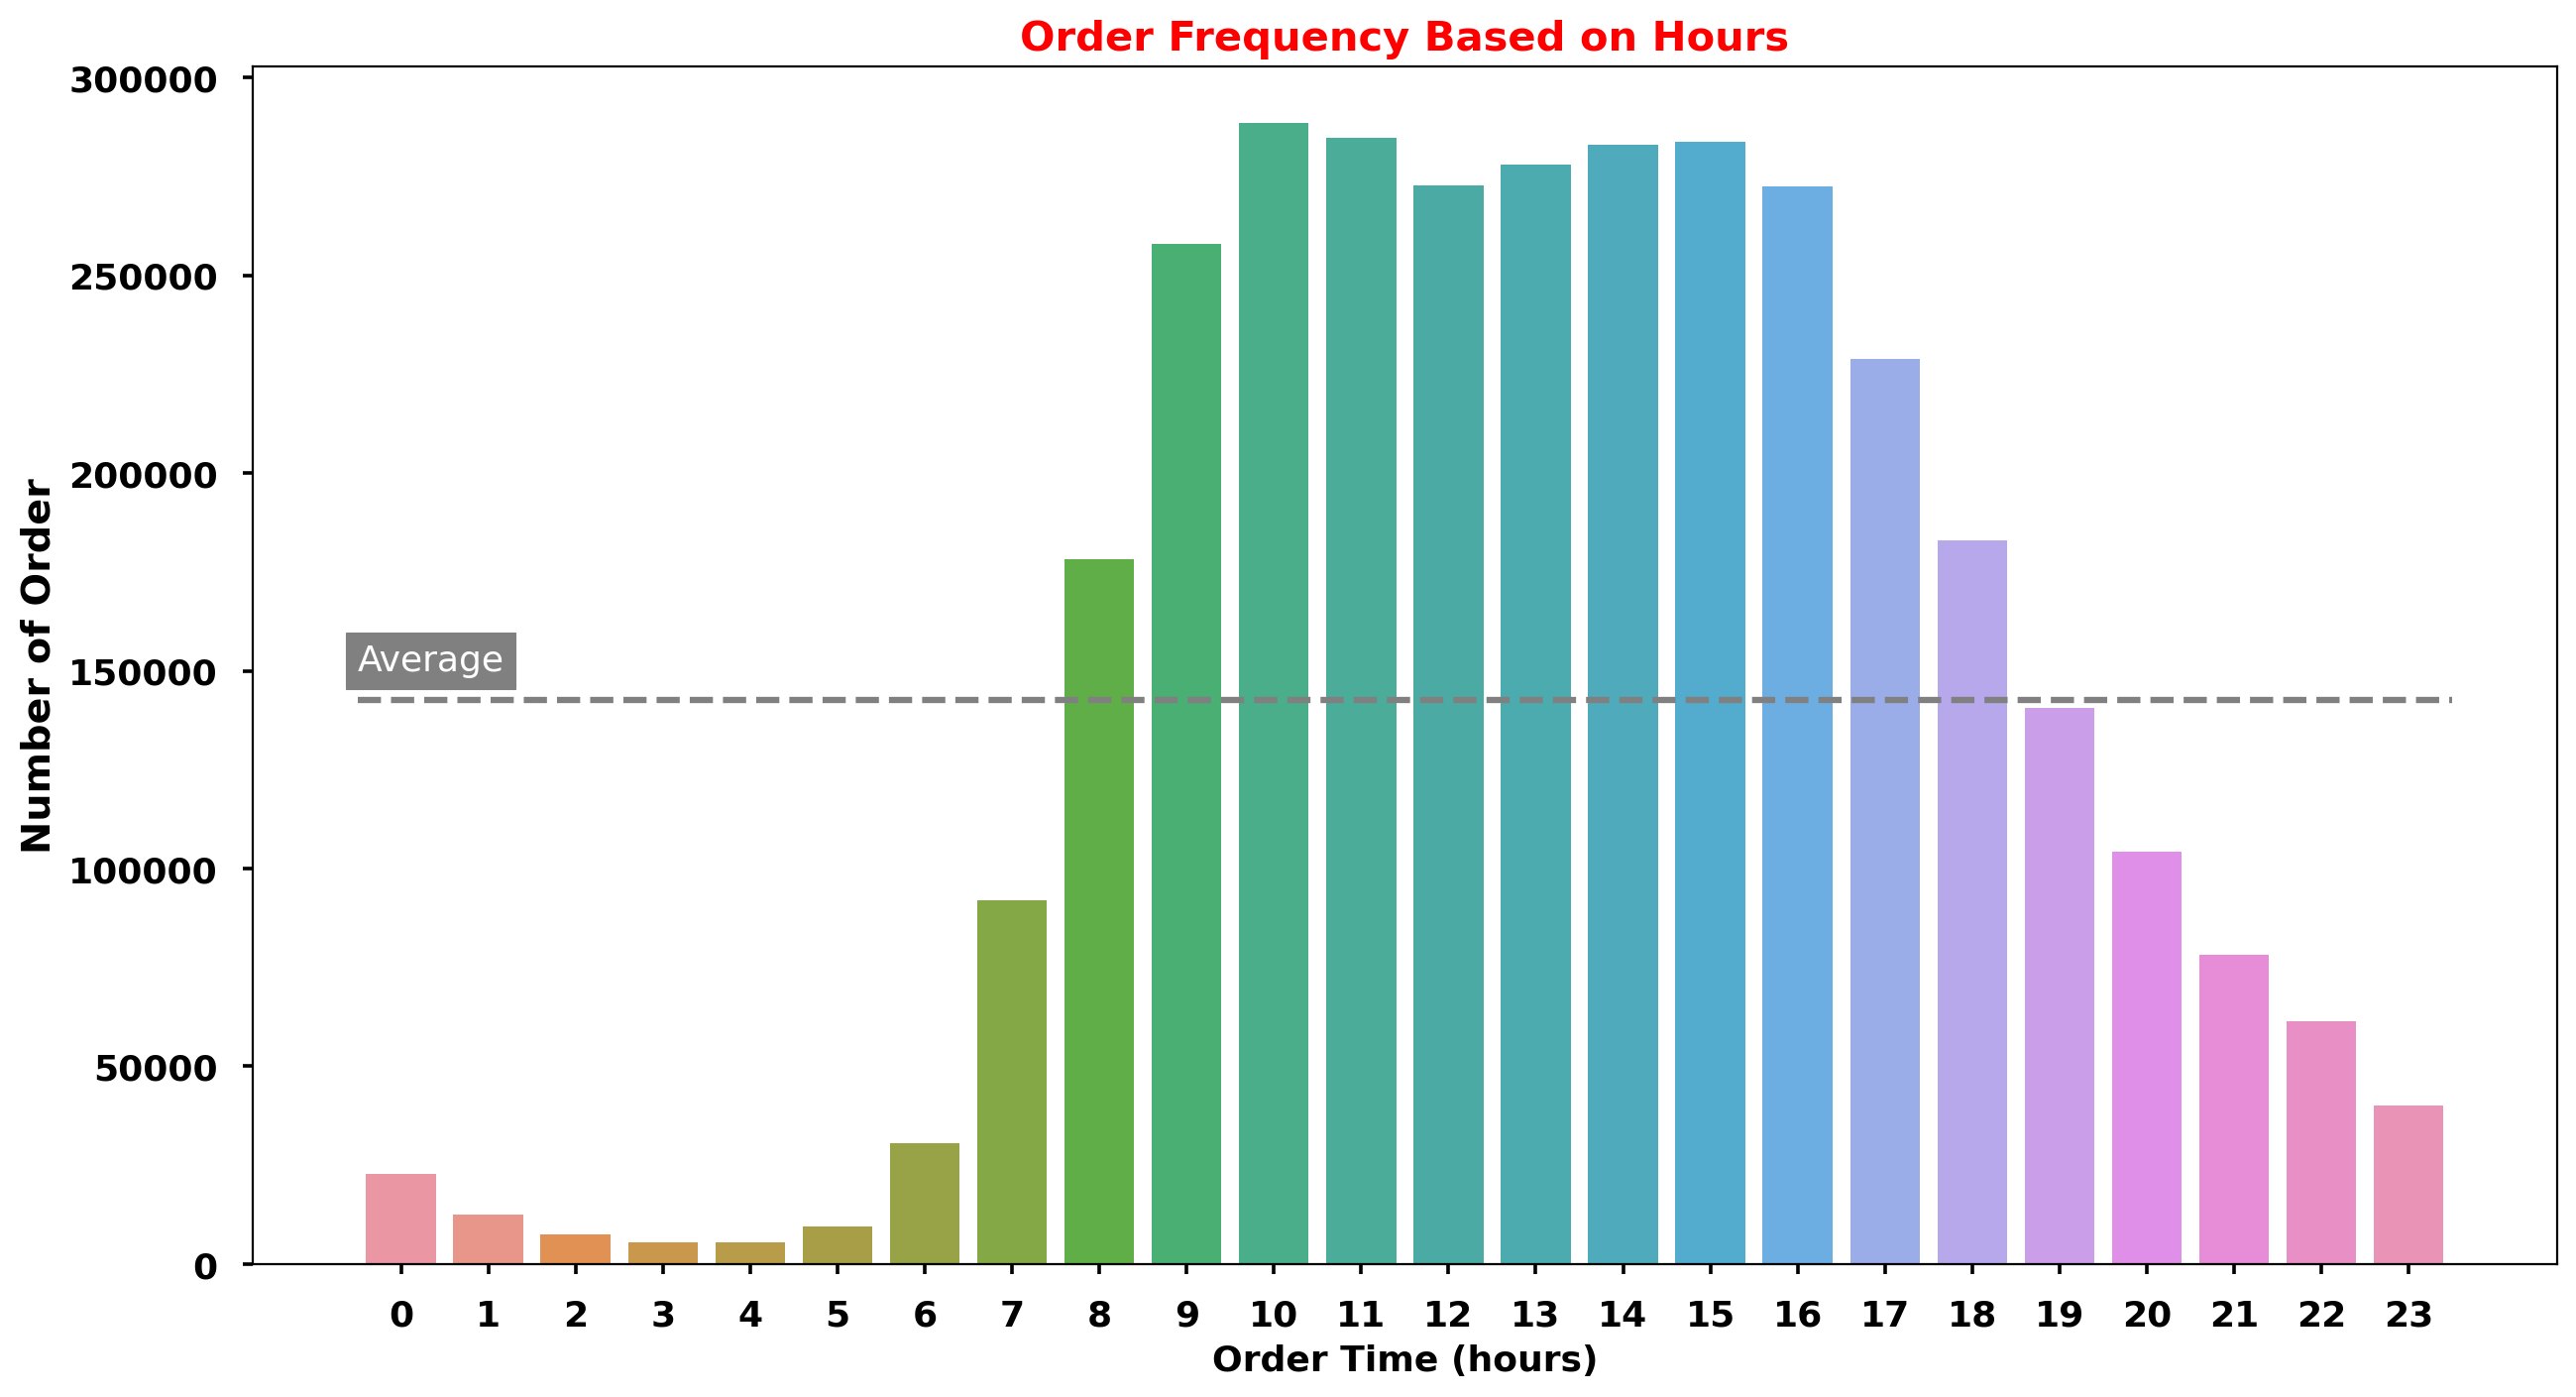

In [20]:
#Frequency or Order Based on Hours
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')
order_hours = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
order_hours = order_hours.order_hour_of_day.value_counts()
sns.barplot(order_hours.index, order_hours.values)
plt.title("Order Frequency Based on Hours", weight="bold", c="red",fontsize=15)
plt.ylabel("Number of Order",weight= "bold")
plt.xlabel('Order Time (hours)', fontsize=13, weight="bold")
x_coordinates = [-0.5, 23.5]
y_median = [142545.125, 142545.125]
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.text(-0.5,150000,'Average',fontsize = 13,backgroundcolor = 'gray',color = 'white')
plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.show()

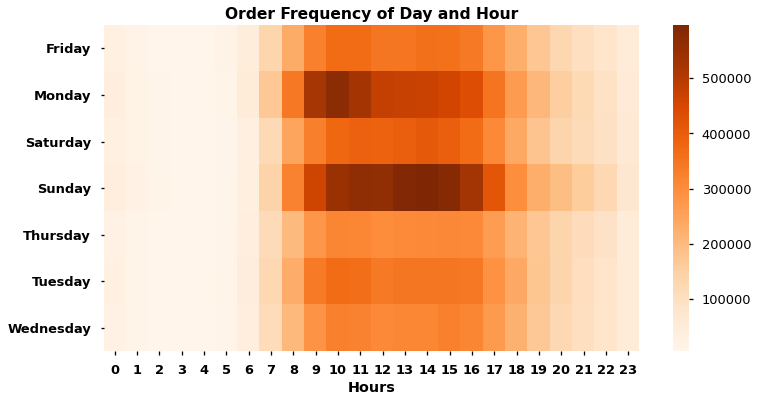

In [22]:
#Heatmap of Frequency or Order Based on Days & Hours
grouped_df = market_basket.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df,cmap="Oranges")
plt.title("Order Frequency of Day and Hour",weight="bold")
plt.ylabel("")
plt.xlabel("Hours",weight="bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

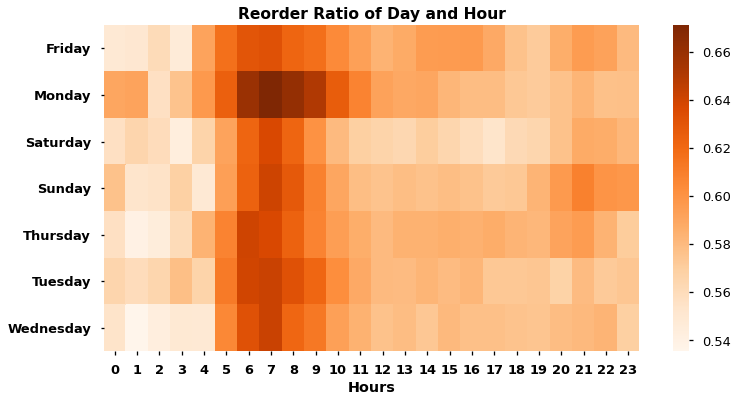

In [24]:
#Reorder Ratio
heatmap_reorder = market_basket.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
heatmap_reorder = heatmap_reorder.pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_reorder,cmap="Oranges")
plt.title("Reorder Ratio of Day and Hour", weight="bold")
plt.ylabel("")
plt.xlabel("Hours",weight="bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [25]:
#Most Sold Products (Top 10)
most_sold_products = market_basket['product_name'].value_counts().reset_index().head(10)
most_sold_products.columns = ['product_name', 'frequency_count']
most_sold_products

product_name  frequency_count
0                  Banana           491291
1  Bag of Organic Bananas           394930
2    Organic Strawberries           275577
3    Organic Baby Spinach           251705
4    Organic Hass Avocado           220877
5         Organic Avocado           184224
6             Large Lemon           160792
7            Strawberries           149445
8                   Limes           146660
9      Organic Whole Milk           142813

In [27]:
#Most Popular Aisle (Top 10)
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')
popular_aisle = market_basket['aisle'].value_counts().head(10)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [28]:
#Most Popular Departments (Top 10)

plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')
popular_department = market_basket['department'].value_counts().head(10)
sns.barplot(popular_department.index, popular_department.values, alpha=0.8)
plt.title("Top 10 Popular Department", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()